<img src="https://raw.githubusercontent.com/UXARRAY/uxarray/main/docs/_static/images/logos/uxarray_logo_h_dark.svg"
     width="30%"
     alt="UXarray logo"
     align="right"
/>

# MPAS Ocean Depth

### In this recipie, you'll visualize:

* 120km MPAS Ocean model output
* Global ocean bottom depth
* Regional bottom depth of the Gulf of Mexico

### Required Cookbook Sections

* TODO
-----



In [59]:
import cartopy.crs as ccrs
import uxarray as ux

In [60]:
grid_path = "../../meshfiles/oQU120.grid.nc"
data_path = "../../meshfiles/oQU120.data.nc"

uxds = ux.open_dataset(grid_path, data_path)

bottom_depth = uxds["bottomDepth"]
bottom_depth_gulf = bottom_depth.subset.bounding_circle((-90.0, 25.0), r=10)

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude bottomDepth)
   .Coastline.I :Feature   [Longitude,Latitude]
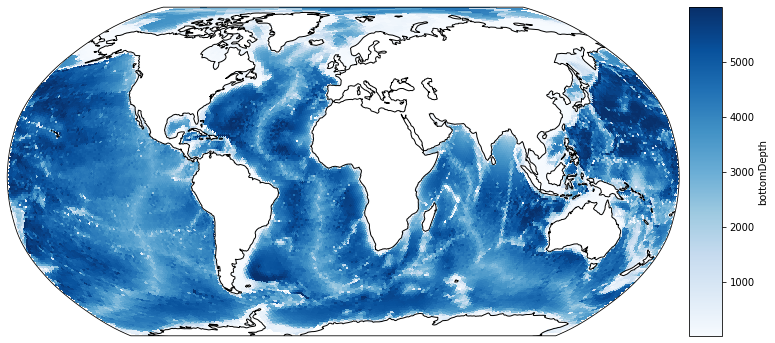

In [61]:
bottom_depth.plot(
    backend="matplotlib",
    projection=ccrs.Robinson(),
    coastline="110m",
    cmap="Blues",
    width=1000,
    pixel_ratio=4.0,
)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (bottomDepth)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
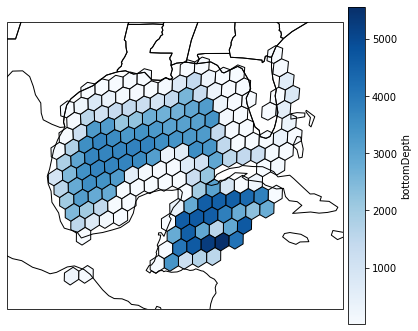

In [64]:
bottom_depth_gulf.plot(
    rasterize=False,
    backend="matplotlib",
    projection=ccrs.Robinson(),
    features=["states", "coastline"],
    cmap="Blues",
    width=500,
)